In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
df = data.copy()

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
buffer = io.StringIO()
data.info(buf=buffer)
s = buffer.getvalue()
print(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB



In [7]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [10]:
data = data.drop(['Surname'],axis=1)

In [11]:
data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.corr().T

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


In [13]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# **EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='Exited', ylabel='count'>

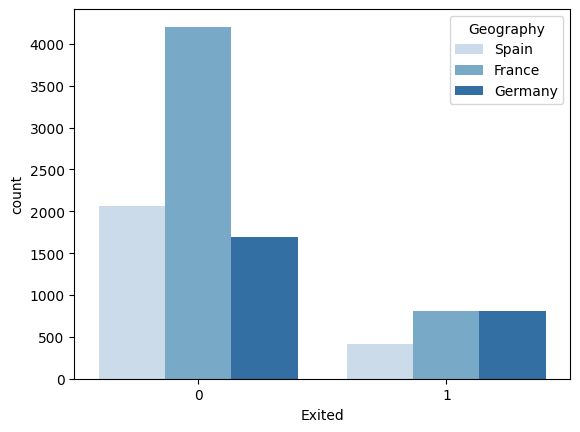

In [14]:
sns.countplot(data=df , x='Exited' , hue='Geography',palette='Blues')

<Axes: xlabel='count', ylabel='Geography'>

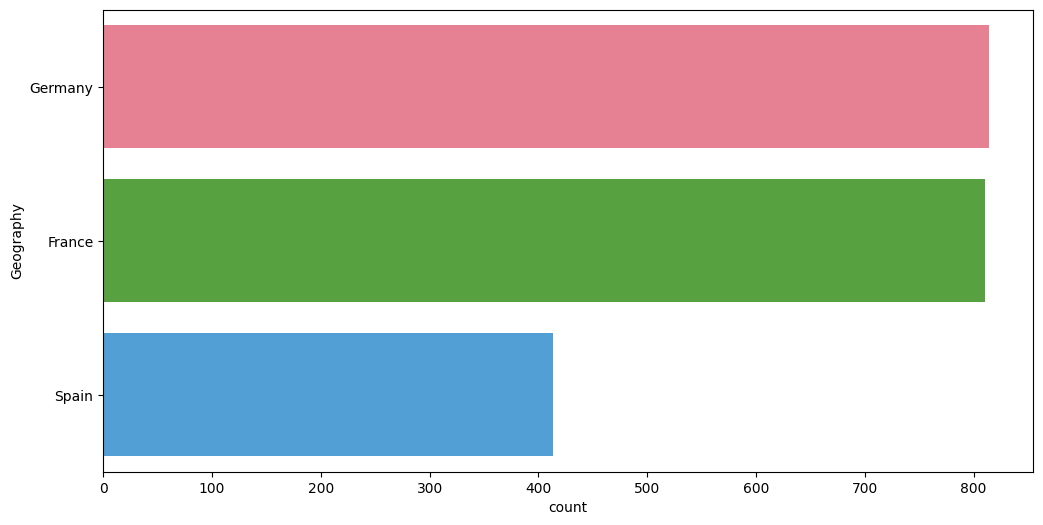

In [15]:
churn = df.loc[df['Exited'] == 1]["Geography"].value_counts()
fig,axes = plt.subplots(figsize=(12,6))
sns.barplot(x=churn,y = churn.index ,palette='husl')

<Axes: xlabel='count', ylabel='Geography'>

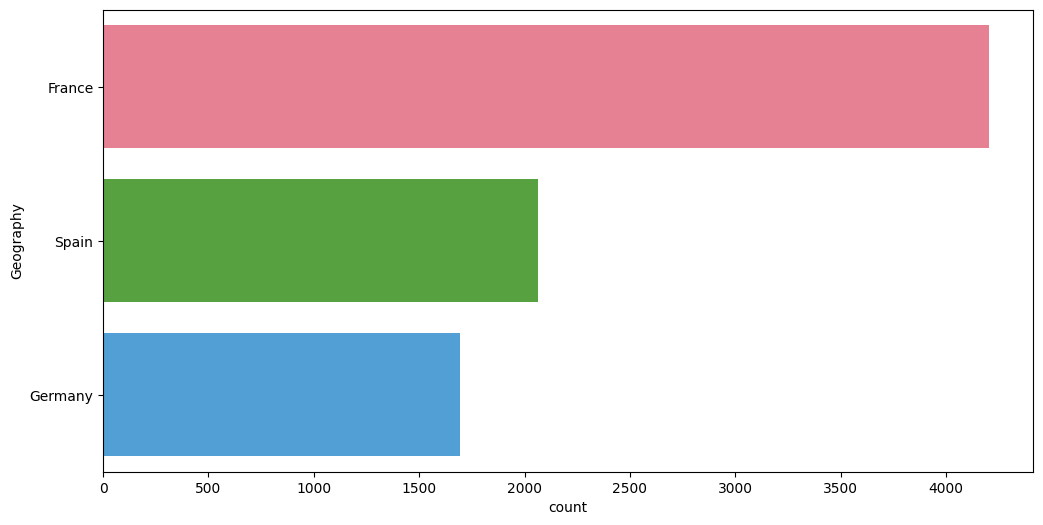

In [16]:
churn = df.loc[df['Exited'] == 0]["Geography"].value_counts()
fig,axes = plt.subplots(figsize=(12,6))
sns.barplot(x=churn,y = churn.index ,palette='husl')

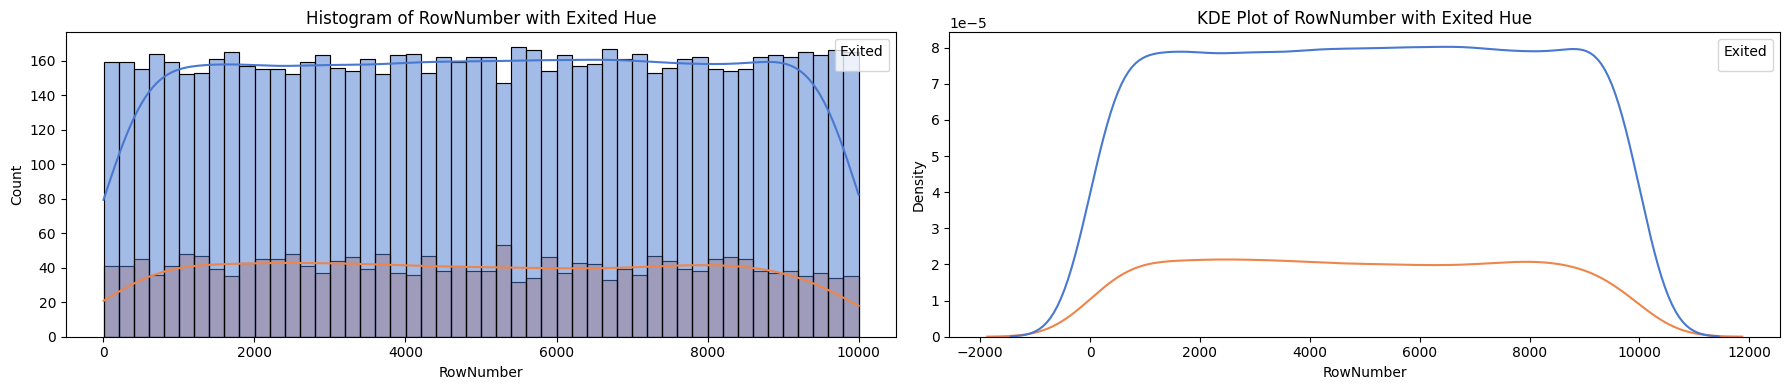

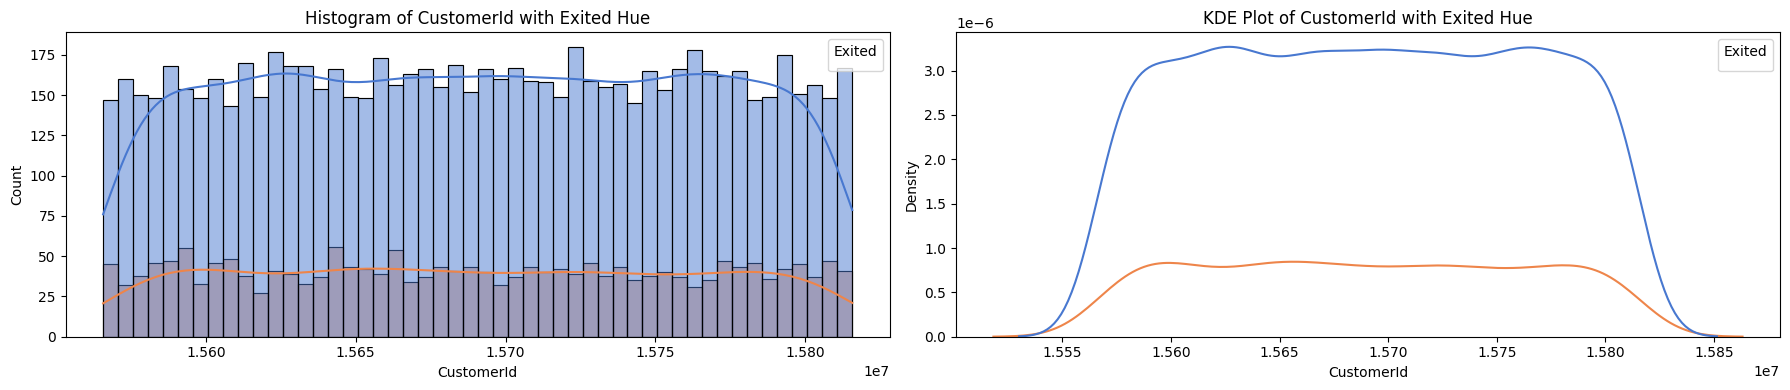

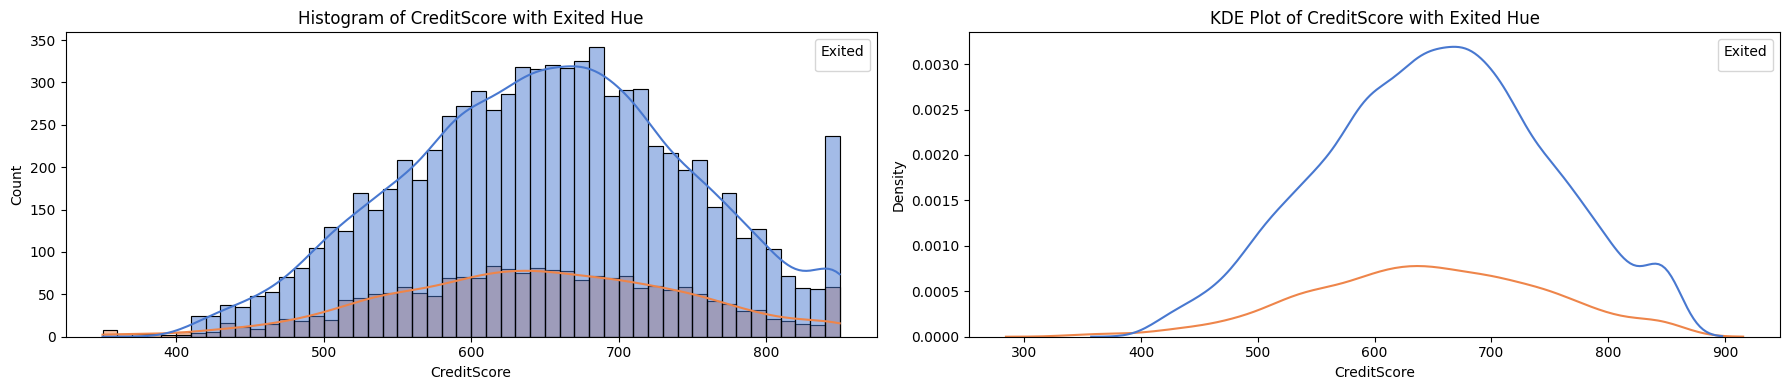

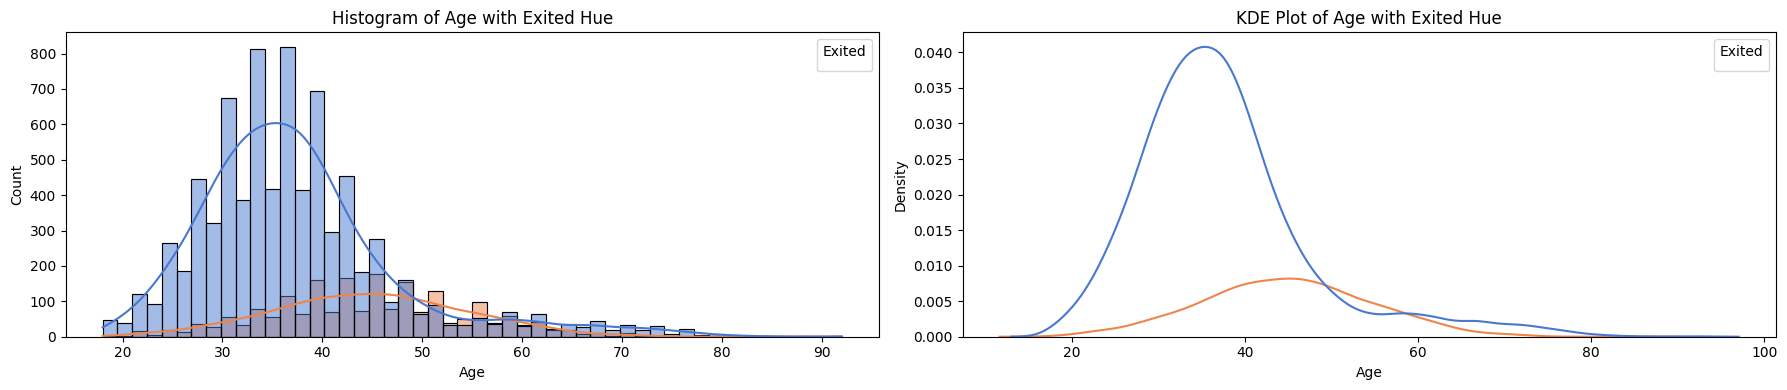

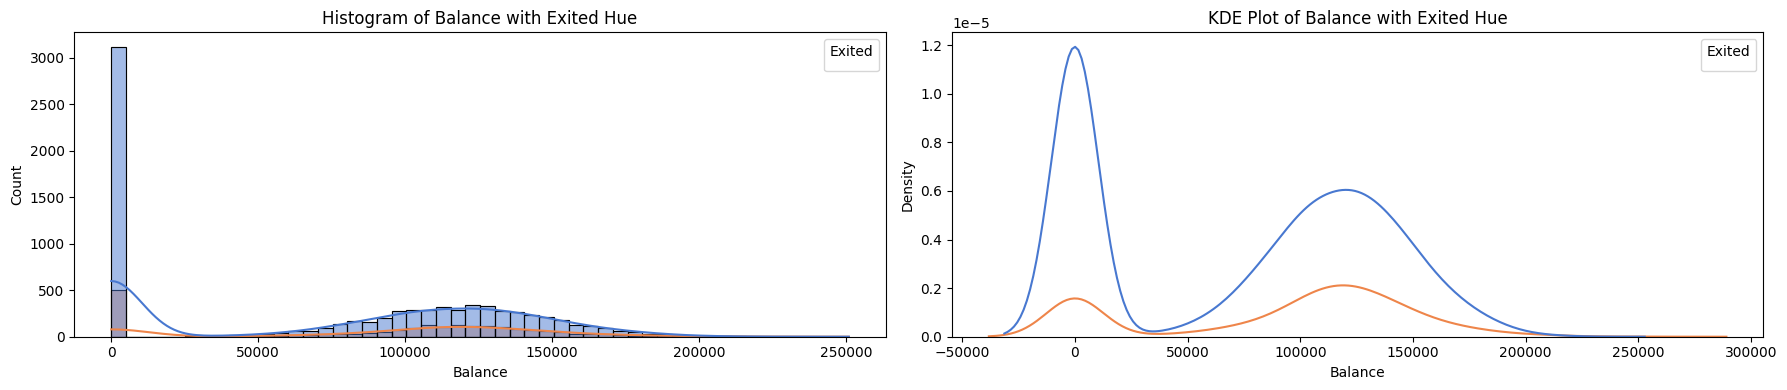

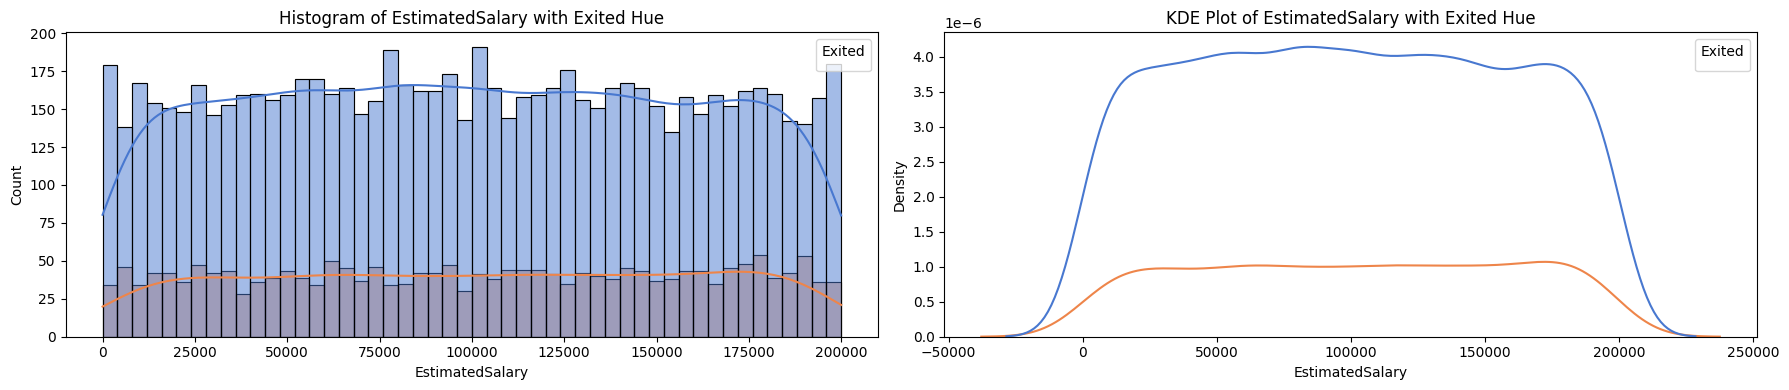

In [17]:
unique_counts = data.nunique()
threshold = 12
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
if 'id' in continuous_vars:
    continuous_vars.remove('id')


target_column = 'Exited'

for column in continuous_vars:
    fig, axes = plt.subplots(1, 2, figsize=(18, 4))

    # Plot histogram with hue
    sns.histplot(data=data, x=column, hue=target_column, bins=50, kde=True, ax=axes[0], palette='muted')
    axes[0].set_title(f'Histogram of {column} with {target_column} Hue')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].legend(title=target_column, loc='upper right')

    # Plot KDE plot with hue
    sns.kdeplot(data=data, x=column, hue=target_column, ax=axes[1], palette='muted')
    axes[1].set_title(f'KDE Plot of {column} with {target_column} Hue')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    axes[1].legend(title=target_column, loc='upper right')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

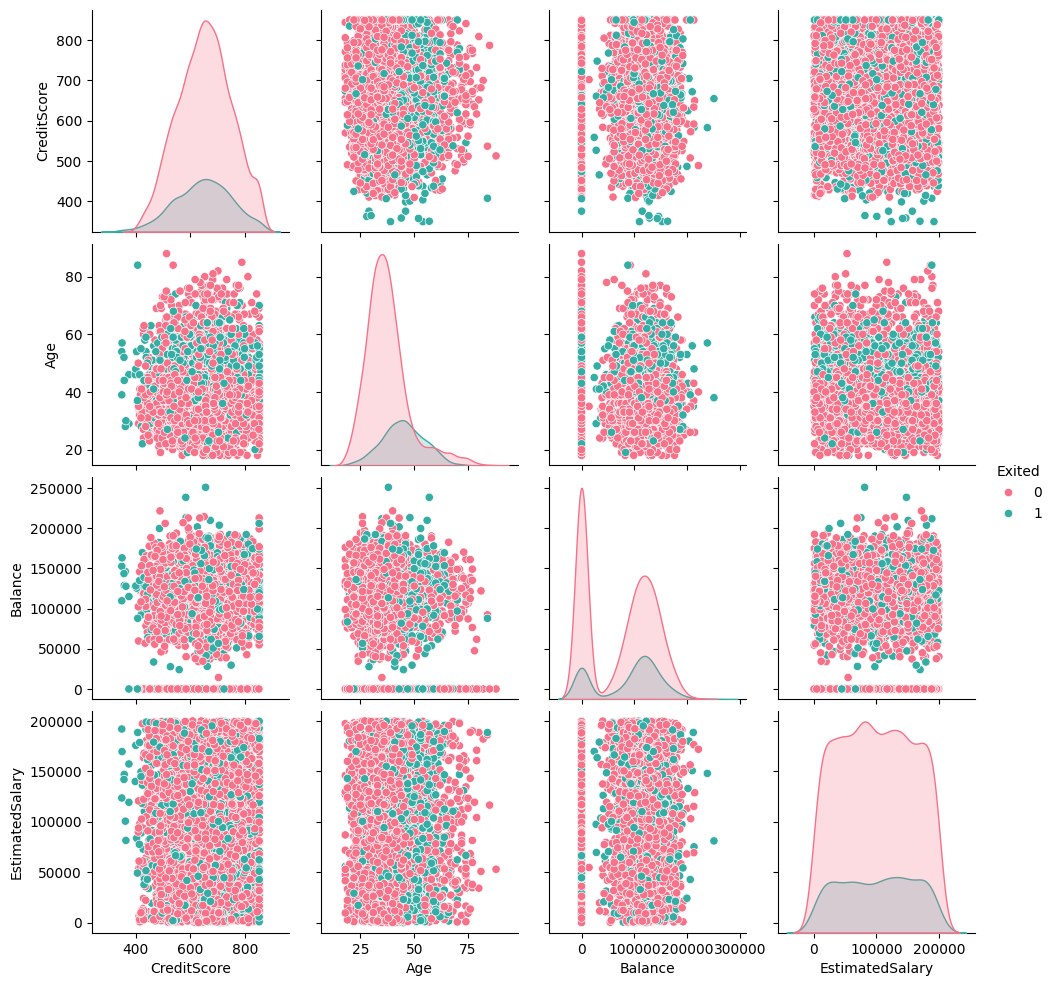

In [18]:
churn_data = data.loc[:len(data) // 2]
churn_data = churn_data[['CreditScore','Age','Balance', 'EstimatedSalary','Exited']]
sns.pairplot(churn_data, hue='Exited', palette='husl', diag_kind='kde')

<Axes: >

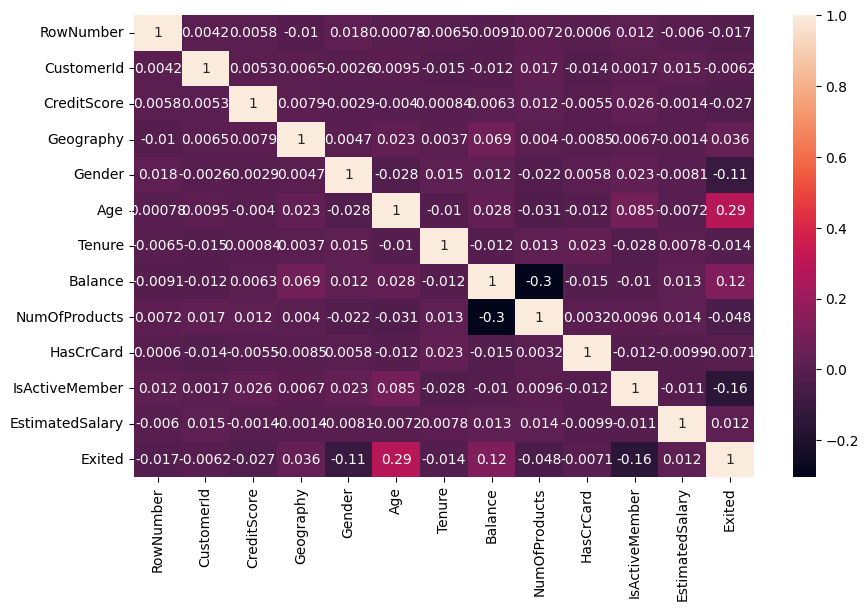

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot=True)

In [20]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

# Handling imbalance data

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **CLASSIFIER MODEL**

# Logistic Regression

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

In [24]:
parameters = {
    'lr__C': [0.1, 1, 10],
    'lr__solver': ['liblinear', 'saga'],
    'lr__penalty': ['l1', 'l2']
}

In [25]:
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Best cross-validation score: 0.7733908948194662


In [26]:
test_score = grid_search.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_score)

Test set accuracy with best parameters: 0.7746390458254865


In [27]:
best_lr = grid_search.best_estimator_
best_lr

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(C=0.1, penalty='l1', solver='saga'))])

In [28]:
predictions = best_lr.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7746390458254865

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1633
           1       0.76      0.79      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.78      0.78      0.77      3186
weighted avg       0.78      0.77      0.77      3186



# K Nearest Neighbour

In [31]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred = KNN.predict(X_test)
    error_rate.append(np.mean(pred !=y_test))

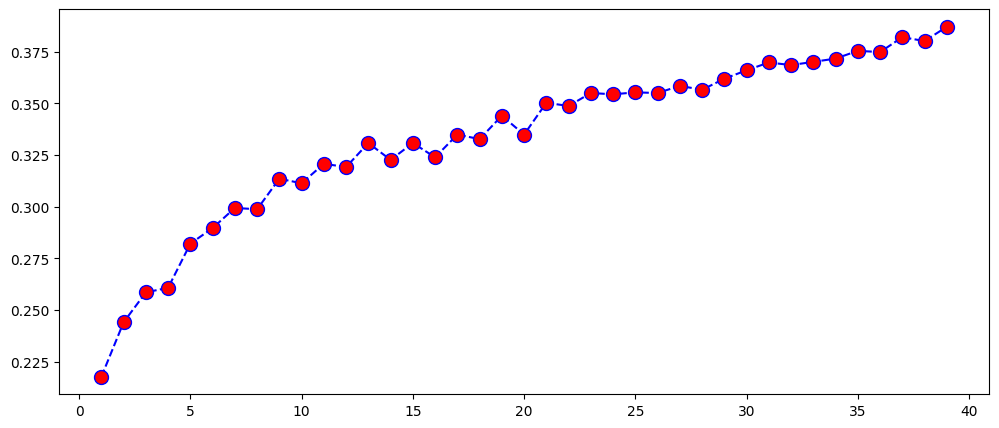

In [32]:
plt.figure(figsize=(12,5))
plt.plot(range(1,40),error_rate,color='blue',markersize=10,markerfacecolor='red',linestyle='dashed',marker='o')

In [33]:
KNN = KNeighborsClassifier(n_neighbors=2,weights='uniform')
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
KNN_prediction = KNN.predict(X_test)

In [35]:
KNN_accuracy = accuracy_score(y_test,KNN_prediction)
KNN_accuracy

0.7558066541117389

In [36]:
print(classification_report(y_test, KNN_prediction))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1633
           1       0.76      0.74      0.75      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



# Decision Tree Classifier

In [37]:
pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [38]:
parameters_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__splitter': ['best', 'random'],
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
}

In [39]:
grid_search_dt = GridSearchCV(pipeline_dt, parameters_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters found for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

Best parameters found for Decision Tree: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 10, 'dt__splitter': 'random'}
Best cross-validation score for Decision Tree: 0.8116169544740973


In [40]:
test_score_dt = grid_search_dt.score(X_test, y_test)
print("Test set accuracy with best parameters for Decision Tree:", test_score_dt)

Test set accuracy with best parameters for Decision Tree: 0.8119899560577527


In [41]:
best_dt = grid_search_dt.best_estimator_
predictions_dt = best_dt.predict(X_test)

In [42]:
accuracy_dt = accuracy_score(y_test, predictions_dt)
accuracy_dt

0.8119899560577527

In [43]:
print(classification_report(y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1633
           1       0.79      0.83      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



# Support Vector Machine

In [44]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42,kernel='linear',C= 1e6))
])

In [45]:
pipeline_svm.fit(X_train, y_train)

best_svm = pipeline_svm

In [46]:
predictions_svm = best_svm.predict(X_test)

In [47]:
accuracy_svm = accuracy_score(y_test, predictions_svm)
accuracy_svm

0.8458882611424984